In [34]:
# Set up stlab
from pyplr import stlab
d = stlab.SpectraTuneLab(password='2294b16eea08a15a')
d.turn_off()

LIGHT HUB login success
User authenticated as: admin
The following addresses are defined: [1, 1004, 1023]
Call get_luminaires() / get_device_info() for more info


<Response [200]>

In [35]:
from time import sleep
from pyplr.pupil import PupilCore

p = PupilCore()

p.command('R our_recording')

sleep(1)

p.command('r')

'OK'

In [36]:
p.check_3d_model()

> Refit the 3d model? [y/n]: n


In [37]:
p = PupilCore()
pgr_future = p.pupil_grabber(topic='pupil.1.3d', seconds=5)

> Grabbing 5 seconds of pupil.1.3d
> PupilGrabber done grabbing 5 seconds of pupil.1.3d


In [38]:
data = pgr_future.result()
data[0]

{'id': 1,
 'topic': 'pupil.1.3d',
 'method': 'pye3d 0.3.0 real-time',
 'norm_pos': [0.7559753057738327, 0.5582014340786117],
 'diameter': 52.55441931288702,
 'confidence': 1.0,
 'timestamp': 728001.398571,
 'sphere': {'center': [12.017258013268473,
   2.257117029518537,
   41.73400995936695],
  'radius': 10.392304845413264},
 'projected_sphere': {'center': [177.52713232337612, 111.32772638416407],
  'axes': [167.95055819068241, 167.95055819068241],
  'angle': 0.0},
 'circle_3d': {'center': [5.968040595194694,
   -1.6030843798714347,
   34.21697505803674],
  'normal': [-0.5820862174519115, -0.37144805380624546, -0.7233270206318015],
  'radius': 2.7870759468966475},
 'diameter_3d': 5.574151893793295,
 'ellipse': {'center': [145.14725870857586, 84.82532465690657],
  'axes': [43.72765251106066, 52.55441931288702],
  'angle': 43.68722180763962},
 'location': [145.14725870857586, 84.82532465690657],
 'model_confidence': 0.1,
 'theta': 1.951364502078303,
 'phi': -2.2484175070445955}

Text(0.5, 0, 'Pupil timestamp (s)')

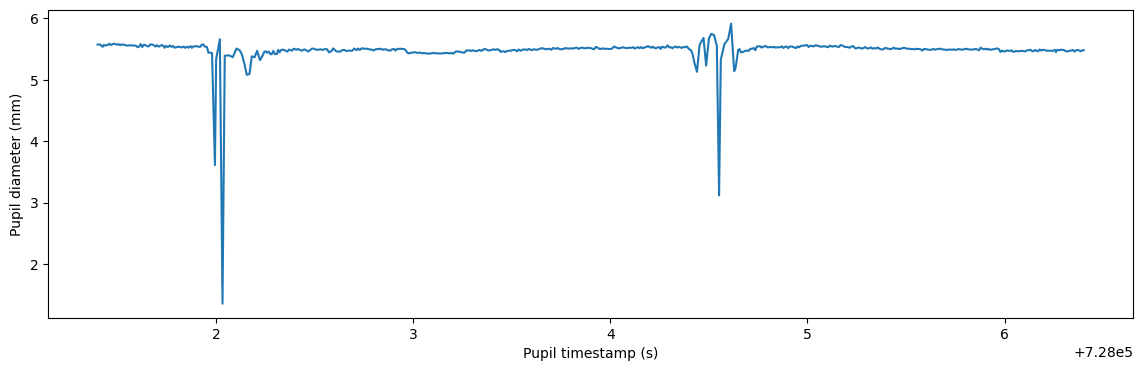

In [39]:
import matplotlib.pyplot as plt
from pyplr.utils import unpack_data_pandas

data = unpack_data_pandas(data, cols=['timestamp','diameter_3d'])
ax = data['diameter_3d'].plot(figsize=(14,4))
ax.set_ylabel('Pupil diameter (mm)')
ax.set_xlabel('Pupil timestamp (s)')